# Project Part 1
Link 1 goes to original project

Link 2 goes to main branch project 

Link 3 goes to feature branch project

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/main/project_part1.ipynb)

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/blob/inputing-data/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets/
* https://www.kaggle.com/datasets
* https://data-flair.training/blogs/machine-learning-datasets/ 
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 


_If you instead are planning to do a more research-oriented or applied type of project, then describe what it is that you plan to do._

_If it is research, then what do you want to understand/explain better?_

_If it is applied, then what it is you plan to build?_ 

THIS IS A TEST

THIS IS A SECONDARY TEST
THIS IS A TERTIARY TEST

## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import os
# ...
#to list the directory for the input data
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cyberbullying-classification/cyberbullying_tweets.csv


Here we are reading the csv file and here you can look at what the data looks like, we can see that the data is sorted into two categories not_cyberbullying and cyberbullying

In [2]:
#input_data_path = https://raw.githubusercontent.com/sgeinitz/CS39AA/main/data/trainB1.csv
input_data_path = 'https://raw.githubusercontent.com/Matthew-Bustamante/CS39AA-Project-Cyberbullying/main/cyberbullying_tweets.csv'

cyberBullying = pd.read_csv(input_data_path, nrows=10000)
cyberBullying.head(3)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying


<Axes: >

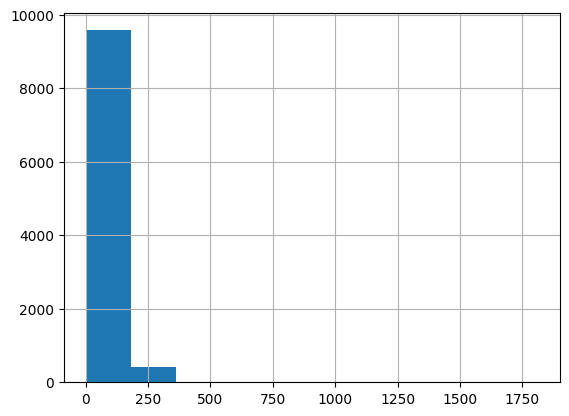

In [3]:
cyberBullying['tweet_text'].str.len().hist()

We can see that majority of these tweets are between 0 and 300 charaters.  

Now lets see how many words are formed from these characters

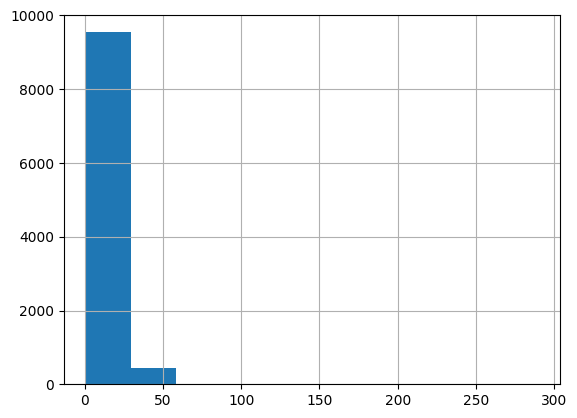

In [4]:
#cyberBullying['tweet_text'].map(lambda x: len(x)).hist()

"""
A method that takes in the dataset and divides up the words into characters and plots the frequecny
of each character to a histogram
"""
def wordNumberHistogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    
wordNumberHistogram(cyberBullying['tweet_text'])

We can see that majority of these tweets fall between 1 and 50 words which makes sense as tweets are suppose to be short and concise

<Axes: >

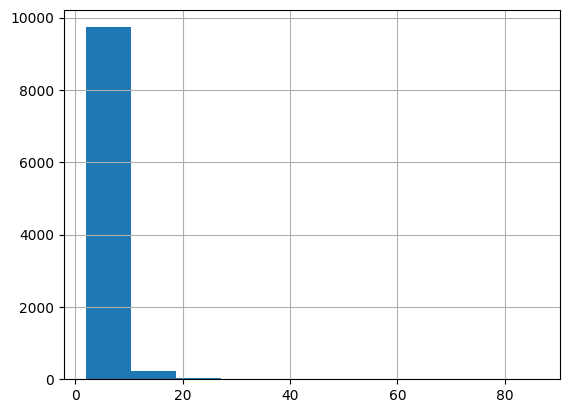

In [5]:
cyberBullying['tweet_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

We can see that these tweets fall between 5 and 25 words.  The majority of these tweets contain about 5 to 15 words.  This makes sense as tweets are usually short and concise

Let's now see how many stopwords this data set has

Stop words are commonly used words that are in a language and it's important to filter them out from less commonly used words so that you can access the least commonly used words. 

Here we want to see how many stop words are used in these tweets

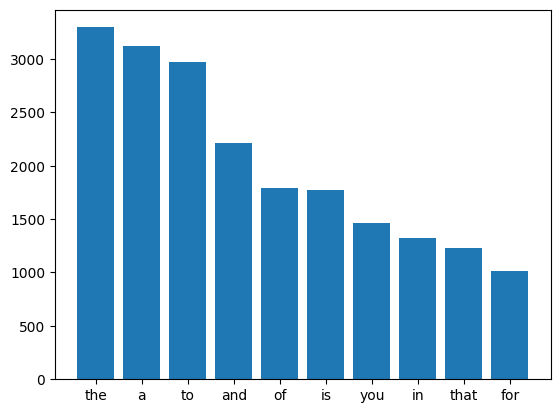

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

plot_top_stopwords_barchart(cyberBullying['tweet_text'])

We can see that the top 3 most used stop words words are 'the', 'a', and 'to' and that about 3000 or more tweets contain these words.  

Now that we have the most common words that are in the dataset lets look at the non-stopwords which are the words that least common.  This will help us see what the words that most commonly used that are not stops words like (the, a, to, etc.)


**TRIGGER WARNING**


Some of the words you may see next are vulgar words 

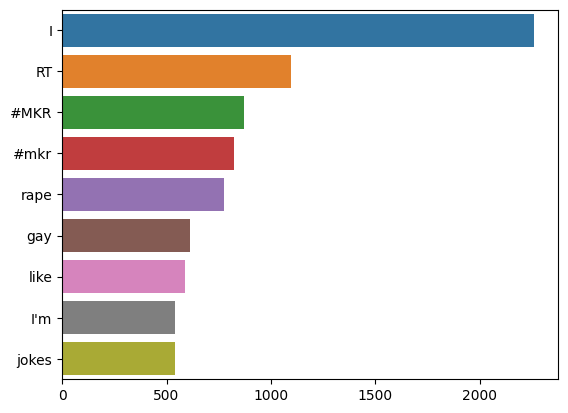

In [7]:
import seaborn as sns
#from nltk.corpus import stopwords
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)
    

plot_top_non_stopwords_barchart(cyberBullying['tweet_text'])

Based on this bar graph we can see that the word "I" and "RT are used quite often.  "RT" stands for retweet so this shows use how many comments are being retweeted which are about 1100.  We can also see an acronymb being used as well called "MKR" which based on some research is an acronym for an Austrilian cooking show called "My Kitchen Rules".  We can also see some vulgar words being used here as well, so this shows us what kind of words that are potentially being used to cyberbully people.

Now lets make an ngram to look sequences of words that are together like 'riverbank, or 'the three musketeers' this will help us show more of what's in the data set 

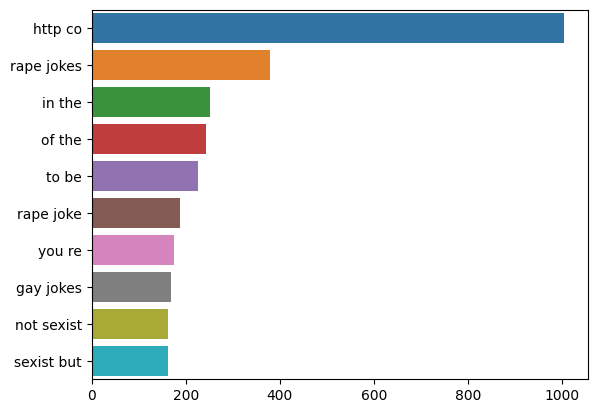

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(cyberBullying['tweet_text'],2)

Now this gives us a better look at some of the tweets look like and the amount of combinations of words that commonly used.  We can see 'http co' which looks like companies website or link to something.  The next sequence is 'rape jokes' which about 400 tweets contain this phrase.  The graph shows us that although these vulgur sequences are not as common they still do exist and this graph helps to break down on which vulgur pharse is used most often.  We can see that a lot of vulgur sequences contain phrases relating to sex, which is one the types of cyberbullying, which could mean that the most common type of cyberbullying in this data set is sexual cyberbullying.